# What is the best Neighborhood?
The metric for best neighborhood can vary depending on the person, however our group decided that the healthiest and safest neighborhood is the best. The healthier a population is, the longer they tend to live and the happier they tend to be. The safer a neighborhood, the less anxiety and fear the population of the neighborhood will have in their security. We will be presenting these metrics by analyzing datasets that cover the median age at death by neighborhood, the parks in each neighborhood, arrests in each neighborhood, the houshold income in each neighborhood, and education enrollment in each neighborhood.

## Finding the Best Neighborhood in Relation to Median Age at Death
Health is a major component to happiness. Those who live longer tend to lead happier, healthier lives. Areas where young deaths are common tend to have higher crime and/or be more dangerous areas. In this notebook, I will be determining what the best area in Pittsburgh to live is based off of the median age at death. Areas with a higher median age at death will be the safer, happier, and healthier areas in Pittsburgh, while those with a lower median may have higher crime and/or be areas where good health is hard to come by.

## Identifying High and Low Median Age at Death Areas
Let's first find the median age at death for all the neighborhoods in Pittsburgh...

In [2]:
import pandas as pd
data = pd.read_csv('nhoodmedianage20112015.csv', sep='\s*,\s*', engine='python')

pd.set_option('display.max_rows', 100)

data[['NEIGHBORHOOD', 'TOTAL MD AGE AT DEATH']]
    

,NEIGHBORHOOD,TOTAL MD AGE AT DEATH
0,SOUTH SHORE,0.0
1,CHATEAU,NaN
2,NORTH SHORE,80.0
3,ALLEGHENY WEST,65.0
4,SAINT CLAIR,67.5
5,WEST END,77.5
6,ESPLEN,71.7
7,ARLINGTON HEIGHTS,63.7
8,STRIP DISTRICT,72.5
9,FAIRYWOOD,53.3


Let's make a bar graph so it's esier to see the spread. This graph will be in order from lowest to highest median age at death

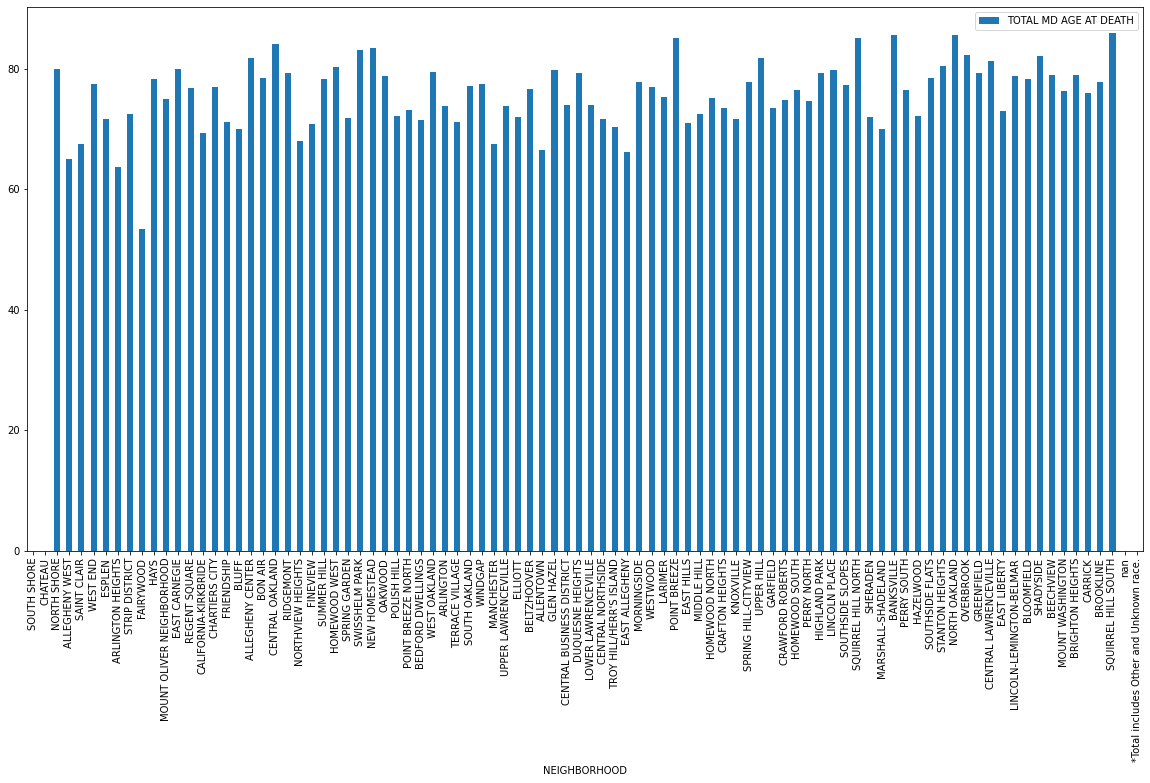

In [3]:
ax = data.plot.bar(x="NEIGHBORHOOD", y = 'TOTAL MD AGE AT DEATH', rot=90, figsize=(20,10))

Now, lets find the 10 neigborhoods with the highest median age at death neighborhoods...

In [4]:
data[['NEIGHBORHOOD', 'TOTAL MD AGE AT DEATH']].nlargest(10, 'TOTAL MD AGE AT DEATH',keep='first')

,NEIGHBORHOOD,TOTAL MD AGE AT DEATH
89,SQUIRREL HILL SOUTH,85.9
76,NORTH OAKLAND,85.6
71,BANKSVILLE,85.5
53,POINT BREEZE,85.1
68,SQUIRREL HILL NORTH,85.0
20,CENTRAL OAKLAND,84.0
28,NEW HOMESTEAD,83.4
27,SWISSHELM PARK,83.1
77,OVERBROOK,82.2
83,SHADYSIDE,82.1


Now lets find the gap between the highest and lowest value in this table of the 10 highest median age at death neighborhoods...

In [5]:
from decimal import Decimal, getcontext
gap = Decimal('85.9') - Decimal('82.1')
print(gap)

3.8


Almost done! Now, let's find the 10 neighborhoods with the lowest median age at death (due to missing data in dataset, neighborhood SOUTH SHORE should be **IGNORED**)

In [6]:
data[['NEIGHBORHOOD', 'TOTAL MD AGE AT DEATH']].nsmallest(11, 'TOTAL MD AGE AT DEATH',keep='first')

,NEIGHBORHOOD,TOTAL MD AGE AT DEATH
0,SOUTH SHORE,0.0
9,FAIRYWOOD,53.3
7,ARLINGTON HEIGHTS,63.7
3,ALLEGHENY WEST,65.0
49,EAST ALLEGHENY,66.2
42,ALLENTOWN,66.5
38,MANCHESTER,67.4
4,SAINT CLAIR,67.5
22,NORTHVIEW HEIGHTS,68.0
14,CALIFORNIA-KIRKBRIDE,69.3


Finally, lets find the gap between the highest and lowest value in this table of the 10 lowest median age at death neighborhoods...

In [7]:
gap = Decimal('70.0') - Decimal('53.3')
print(gap)

16.7


# Analyzing Interesting Anomalies in Data
As you can see, the values of the neighborhoods with the highest median age at death are all relitively similar, with a gap of 3.8 between the highest and lowest median age at death. The values of the neighborhoods with the lowest median age at death, however, seem to vary, with a 16.7 year gap in age between the highest and lowest median age at death. Why is that? Let's look at more data on the neighborhood of FAIRYWOOD.

In [8]:
data.iloc[9]

NEIGHBORHOOD             FAIRYWOOD
BLACKdeaths                   11.0
Black MD AGE AT DEATH         62.5
WHITEdeaths                    9.0
White MD AGE AT DEATH         42.5
TOTALdeaths*                  21.0
TOTAL MD AGE AT DEATH         53.3
Name: 9, dtype: object

After looking at more data, we can see that we are finding the median for only 21 deaths. Let's see if that is that is above or below the average for this data set... **(In this data set TOTALdeaths* counts all deaths including deaths from Other and Uknown races.)**

In [9]:
data['TOTALdeaths*'].mean()

171.2111111111111

This average seems WAY higher than the average for FAIRYWOOD. Let's see if this is being weighted by just one large total death count, or if FAIRYWOOD has a very low total death count compared to most of the other neighborhoods.

In [10]:
data[['NEIGHBORHOOD', 'TOTALdeaths*']].nlargest(50, 'TOTALdeaths*', keep='first')

,NEIGHBORHOOD,TOTALdeaths*
89,SQUIRREL HILL SOUTH,802.0
88,BROOKLINE,750.0
87,CARRICK,678.0
86,BRIGHTON HEIGHTS,496.0
85,MOUNT WASHINGTON,476.0
84,BEECHVIEW,434.0
83,SHADYSIDE,406.0
82,BLOOMFIELD,394.0
81,LINCOLN-LEMINGTON-BELMAR,389.0
80,EAST LIBERTY,364.0


Now, after finding the average total death count AND checking to make sure the total death count average is being unfairly weighted by just one area, let's refine out data to find the neighborhoods with the highest and lowest median age at death only in areas with "sufficient" data. For us, this will be a TOTALdeaths* value greater than or equal to 100. We will start by displaying valid neighborhoods.

In [11]:
pd.set_option('display.max_rows', 10)
refined_data = data[data['TOTALdeaths*'] > 100]
refined_data

,NEIGHBORHOOD,BLACKdeaths,Black MD AGE AT DEATH,WHITEdeaths,White MD AGE AT DEATH,TOTALdeaths*,TOTAL MD AGE AT DEATH
36,SOUTH OAKLAND,37.0,75.7,63.0,77.5,103.0,77.1
37,WINDGAP,24.0,71.2,80.0,80.4,104.0,77.5
38,MANCHESTER,97.0,67.2,15.0,70.0,113.0,67.4
39,UPPER LAWRENCEVILLE,8.0,48.3,111.0,75.5,119.0,73.7
40,ELLIOTT,28.0,67.0,91.0,73.7,121.0,72.0
...,...,...,...,...,...,...,...
85,MOUNT WASHINGTON,35.0,68.1,433.0,77.0,476.0,76.3
86,BRIGHTON HEIGHTS,56.0,63.7,432.0,80.3,496.0,78.9
87,CARRICK,35.0,59.4,622.0,77.0,678.0,75.9
88,BROOKLINE,13.0,61.2,723.0,78.1,750.0,77.8


As we can see, eliminating neighborhoods with "insufficient" data has significantly reduced our dataset size. With this new dataset, we can now find a more reliable answer for the highest and lowest median age at death neighborhoods. Let's start with highest...

In [39]:
pd.set_option('display.max_rows', 11)
highest_lifes = refined_data[['NEIGHBORHOOD', 'TOTAL MD AGE AT DEATH']].nlargest(11, 'TOTAL MD AGE AT DEATH',keep='first')
highest_lifes

,NEIGHBORHOOD,TOTAL MD AGE AT DEATH
89,SQUIRREL HILL SOUTH,85.9
76,NORTH OAKLAND,85.6
71,BANKSVILLE,85.5
53,POINT BREEZE,85.1
68,SQUIRREL HILL NORTH,85.0
77,OVERBROOK,82.2
83,SHADYSIDE,82.1
60,UPPER HILL,81.7
79,CENTRAL LAWRENCEVILLE,81.3
75,STANTON HEIGHTS,80.5


Now the lowest...

In [13]:
refined_data[['NEIGHBORHOOD', 'TOTAL MD AGE AT DEATH']].nsmallest(11, 'TOTAL MD AGE AT DEATH',keep='first')

,NEIGHBORHOOD,TOTAL MD AGE AT DEATH
49,EAST ALLEGHENY,66.2
42,ALLENTOWN,66.5
38,MANCHESTER,67.4
70,MARSHALL-SHADELAND,70.0
48,TROY HILL/HERR'S ISLAND,70.3
54,EAST HILLS,70.9
47,CENTRAL NORTHSIDE,71.7
58,KNOXVILLE,71.7
40,ELLIOTT,72.0
69,SHERADEN,72.0


Now, after eliminating areas with insufficint data, we have good idea of what neighborhoods in Pittsburgh have the healthiest population. Using this we can come to see that the healthiest neighborhoods all fall within a very close margin. In order, the top 5 are:
* Squirrel Hill South
* North Oakland
* Banksville
* Point Breeze
* Squirrel Hill North

## Finding Best Neighborhood in Relation to Household Income and Educational Attainment

Neighborhoods that have higher income individuals and with more education tend to be safer neighborhoods. This tends to happen for many reasons such as: more businesses settle in those areas, those areas have higher tax rates, etc. On top of this, areas with more educated individuals tend to be richer areas and, in turn, safer areas. In this section, I am going to find neighborhoods with higher incomes and a higher educational attainment (the highest level of education an individual has recieved). I believe this can give us an idea of those areas that will be safer and will most likely live healthier lives.

In [14]:
import pandas as pd
pd.set_option('display.max_rows', 999)

hinc = pd.read_csv("household-income-in-the-past-12-months-in-2015-inflation-adjusted-dollars.csv")
hinc.drop(hinc[hinc["Estimate; Total:"] < 50].index, inplace=True)

hinc.head()

,Neighborhood,Id,Estimate; Total:,Margin of Error; Total:,"Estimate; Total: - Less than $10,000","Margin of Error; Total: - Less than $10,000","Estimate; Total: - $10,000 to $14,999","Margin of Error; Total: - $10,000 to $14,999","Estimate; Total: - $15,000 to $19,999","Margin of Error; Total: - $15,000 to $19,999",...,"Estimate; Total: - $75,000 to $99,999","Margin of Error; Total: - $75,000 to $99,999","Estimate; Total: - $100,000 to $124,999","Margin of Error; Total: - $100,000 to $124,999","Estimate; Total: - $125,000 to $149,999","Margin of Error; Total: - $125,000 to $149,999","Estimate; Total: - $150,000 to $199,999","Margin of Error; Total: - $150,000 to $199,999","Estimate; Total: - $200,000 or more","Margin of Error; Total: - $200,000 or more"
0,Allegheny Center,1,870.0,93.000000,147.0,57.000000,115.0,54.000000,30.0,21.000000,...,73.0,39.000000,26.0,18.000000,25.0,25.000000,12.0,17.000000,21.0,21.000000
1,Allegheny West,2,146.0,36.000000,0.0,10.000000,3.0,7.000000,4.0,6.000000,...,11.0,10.000000,20.0,17.000000,0.0,10.000000,9.0,13.000000,21.0,24.000000
2,Allentown,3,1069.0,132.457540,190.0,82.134037,78.0,42.825226,78.0,80.305666,...,36.0,32.015621,31.0,42.941821,14.0,27.856777,0.0,17.320508,3.0,16.248077
3,Arlington,4,701.0,104.465305,70.0,42.497059,35.0,26.870058,56.0,29.086079,...,141.0,54.212545,23.0,17.804494,6.0,16.248077,7.0,17.320508,2.0,15.000000
4,Arlington Heights,5,144.0,59.000000,48.0,42.000000,23.0,27.000000,43.0,52.000000,...,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000


This first dataset uses buckets to describe household income, so we will need to come up with some way to turn this collection of split up data into a single score for each county.

Here, I decided to conservatively count each bucket as being numerically equivalent to its lower bound. For example, all households surveyed that were placed in the bucket for 15,000 to 19,999 will be counted as making 15,000 annually. This is because of the final bucket, which has no upper bound. So each county's score will be (the sum of the values in each relevant column times that column's bucket's lower bound) divided by the number of households in that neighborhood that were sampled.

In [15]:
columnincomedict = {"col": [4 + 2 * i for i in range(16)], "income":
                   [0, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 75, 100, 125, 150, 200]}

nbscoreshinc = pd.DataFrame({"neighborhood": [], "score": []})

for i in range(len(hinc.index)):
    neighborhood = hinc.iloc[i, 0]
    
    score = 0
    for j in range(16):
        rowindex = columnincomedict["col"][j]
        indexincome = columnincomedict["income"][j]
        score += (hinc.iloc[i, rowindex] * indexincome)
        
    score /= hinc.iloc[i, 2]
        
    nbscoreshinc.loc[i] = {"neighborhood": neighborhood, "score": score}

nbscoreshinc.head()

,neighborhood,score
0,Allegheny Center,40.758621
1,Allegheny West,75.582192
2,Allentown,31.693171
3,Arlington,44.065621
4,Arlington Heights,13.090278


Doing exactly what we wanted! Let's sort and visualize the data now:

In [16]:
sortedhinc = nbscoreshinc.sort_values(by=["score"], ascending=False)

sortedhinc.head()

,neighborhood,score
74,Squirrel Hill North,103.351632
78,Strip District,96.432692
62,Point Breeze,96.161401
65,Regent Square,86.680672
16,Central Business District,78.036077


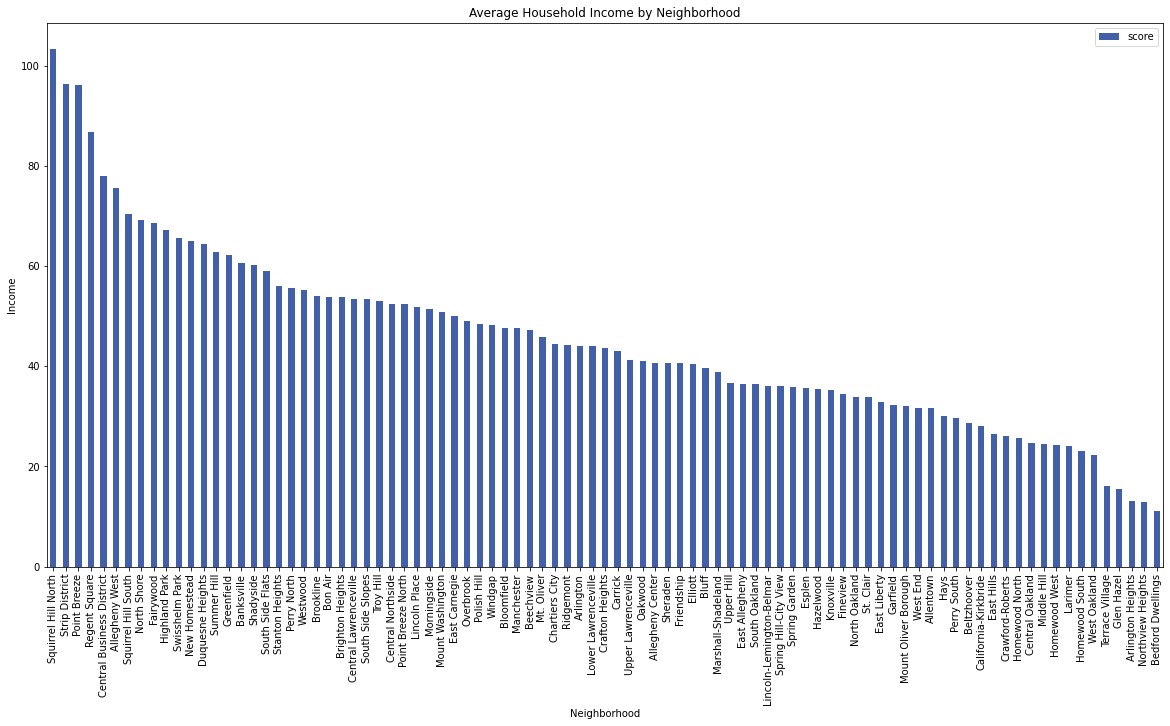

In [17]:
sortedhinc.plot.bar(x="neighborhood", xlabel="Neighborhood", ylabel="Income", color="#425faa",
                    rot=90, figsize=(20,10), title="Average Household Income by Neighborhood")

It looks like Squirrel Hill North, the Strip District, and Point Breeze are our top 3. Let's add the data for educational attainment to further see how money and education are linked.

In [18]:
edu = pd.read_csv("educational-attainment-for-the-population-25-years-and-over.csv")

edu.drop(edu[edu["Estimate; Total:"] < 50].index, inplace=True)

edu.head()

,Neighborhood,Id,Estimate; Total:,Margin of Error; Total:,Estimate; Total: - No schooling completed,Margin of Error; Total: - No schooling completed,Estimate; Total: - Nursery school,Margin of Error; Total: - Nursery school,Estimate; Total: - Kindergarten,Margin of Error; Total: - Kindergarten,...,Estimate; Total: - Associate's degree,Margin of Error; Total: - Associate's degree,Estimate; Total: - Bachelor's degree,Margin of Error; Total: - Bachelor's degree,Estimate; Total: - Master's degree,Margin of Error; Total: - Master's degree,Estimate; Total: - Professional school degree,Margin of Error; Total: - Professional school degree,Estimate; Total: - Doctorate degree,Margin of Error; Total: - Doctorate degree
0,Allegheny Center,1,1002.0,139.000000,10.0,14.000000,0.0,10.000000,0.0,10.000000,...,87.0,52.000000,274.0,77.000000,80.0,46.000000,125.0,66.000000,8.0,11.000000
1,Allegheny West,2,293.0,72.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,...,16.0,10.000000,88.0,34.000000,33.0,29.000000,27.0,31.000000,20.0,26.000000
2,Allentown,3,1577.0,227.187148,19.0,27.000000,0.0,17.320508,0.0,17.320508,...,54.0,34.871192,70.0,42.626283,35.0,29.529646,22.0,29.597297,0.0,17.320508
3,Arlington,4,1296.0,218.515446,31.0,32.878564,0.0,17.320508,0.0,17.320508,...,147.0,59.405387,94.0,43.127717,25.0,22.158520,4.0,15.779734,0.0,17.320508
4,Arlington Heights,5,121.0,63.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,...,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000


This data set has a similar bucketing system to the household income set, so the method to create scores will be similar. I decided to use a system where each level of educational attainment maps to the approximate number of years required to have attained that level of education.

In the dictionary below, they are mapped as they were above. The 'difficult' decisions:
-  Getting diploma at end of HS adds a year over not getting one
-  < 1yr college is assumed to be 1/2yr college
-  \> 1yr college, no degree is assumed to be 2yr college
-  Master's assumed to take 2yr
-  Professional degree and doctorate assumed to take 6yr and be completed without having gotten a Master's

In [19]:
columnyearsdict = {"col": [4 + 2 * i for i in range(24)], "years":
                   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 15, 15.5, 17, 17, 19, 21, 25, 25]}

Now we can find each county's score (same process as before):

In [20]:
nbscoresedu = pd.DataFrame({"neighborhood": [], "score": []})

for i in range(len(edu.index)):
    neighborhood = edu.iloc[i, 0]
    
    score = 0
    for j in range(23):
        rowindex = columnyearsdict["col"][j]
        indexyears = columnyearsdict["years"][j]
        score += (edu.iloc[i, rowindex] * indexyears)
        
    score /= edu.iloc[i, 2]
        
    nbscoresedu.loc[i] = {"neighborhood": neighborhood, "score": score}

nbscoresedu.head()

,neighborhood,score
0,Allegheny Center,17.987525
1,Allegheny West,16.883959
2,Allentown,15.510780
3,Arlington,15.378086
4,Arlington Heights,14.140496


In [21]:
sortededu = nbscoresedu.sort_values(by=["score"], ascending=False)

sortededu.head()

,neighborhood,score
78,Strip District,18.451754
65,Regent Square,18.377193
56,North Shore,18.295322
16,Central Business District,18.230104
0,Allegheny Center,17.987525


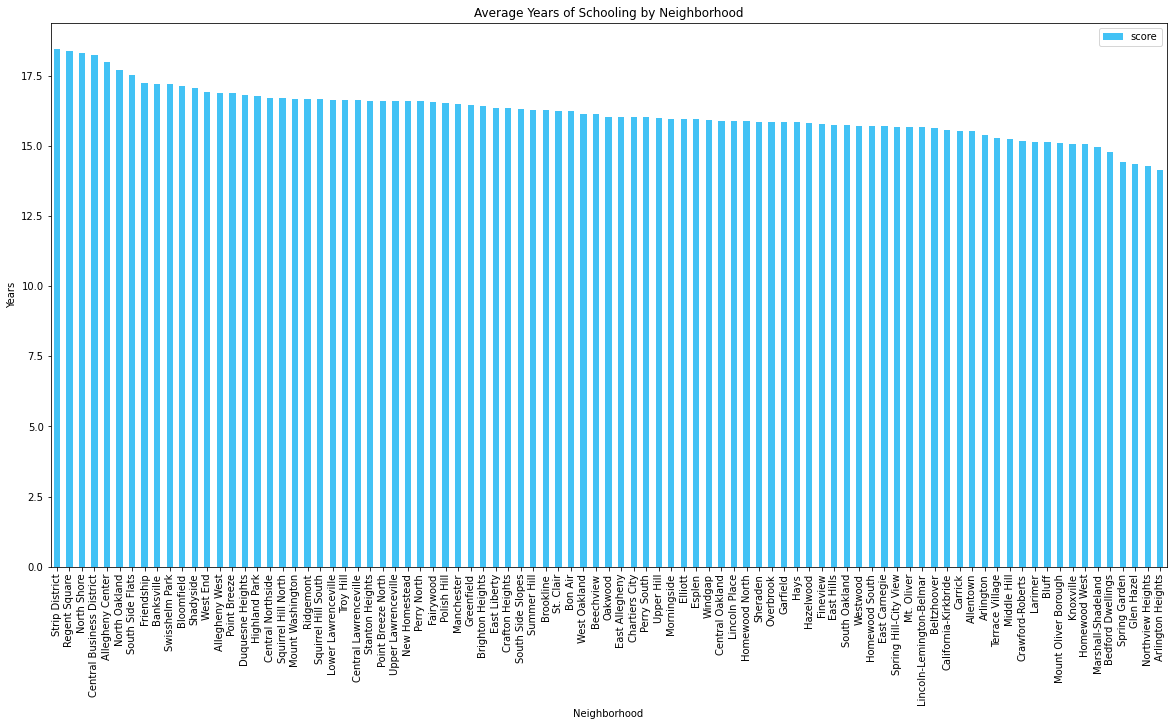

In [22]:
sortededu.plot.bar(x="neighborhood", xlabel="Neighborhood", ylabel="Years", color="#42c2f5",
                    rot=90, figsize=(20,10), title="Average Years of Schooling by Neighborhood")

In [23]:
nbscores = pd.DataFrame({"neighborhood": [], "hinc_score": [], "edu_score": []})
nbscores["neighborhood"] = nbscoreshinc["neighborhood"]
nbscores["hinc_score"] = nbscoreshinc["score"]
nbscores["edu_score"] = nbscoresedu["score"]

nbscores.head()

,neighborhood,hinc_score,edu_score
0,Allegheny Center,40.758621,17.987525
1,Allegheny West,75.582192,16.883959
2,Allentown,31.693171,15.510780
3,Arlington,44.065621,15.378086
4,Arlington Heights,13.090278,14.140496


We can now plot both the scores for household income and educational attainment together. Let's see what that looks like...

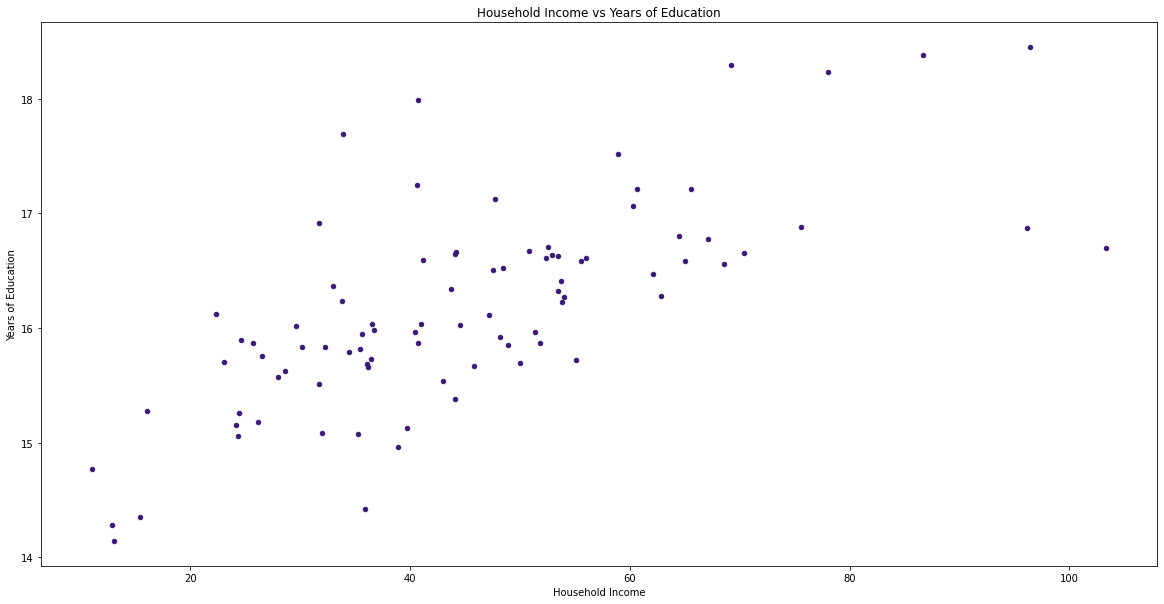

In [24]:
nbscores.plot.scatter(x="hinc_score", y="edu_score", xlabel="Household Income", ylabel="Years of Education", 
                      color="#3a1a78", figsize=(20,10), title="Household Income vs Years of Education")

Seeing this graph, there is a clear positive correlation. However, it is difficult to decide which neighborhood is best because the neighborhood with the highest in either metric are not in the top five of the other metric. The Strip District seems like a clear winner, but to formalize both metrics into one, I have decided to use the formula

overall_score = (hinc_score/max_hinc_score + edu_score/max_edu_score) / 2 

to find each neighborhood's average standing in comparison to the best of each category.

Let's apply this formula and look at the results:

In [25]:
max_hinc_score = nbscores["hinc_score"].max()
max_edu_score = nbscores["edu_score"].max()

nbscores["overall_score"] = ((nbscores["hinc_score"] / max_hinc_score) + 
                                (nbscores["edu_score"] / max_edu_score)) / 2

sortednbscores = nbscores.sort_values(by=["overall_score"], ascending=False)
sortednbscores.head()

,neighborhood,hinc_score,edu_score,overall_score
78,Strip District,96.432692,18.451754,0.966527
74,Squirrel Hill North,103.351632,16.699211,0.952510
62,Point Breeze,96.161401,16.876123,0.922519
65,Regent Square,86.680672,18.377193,0.917328
16,Central Business District,78.036077,18.230104,0.871521


In the end,the Strip District and Squirrel Hill North ended up being the top 2. Considering household income and educational attainment, the Strip District wins.

## Finding Best Neighborhood in Relation to Number of Parks and Police Arrest Data

One of the biggest and most important aspects to staying healthy happens to be physical activity and getting outside. One way to get the population ouside more is to incorporate parks into the neighborhood. However, there can be 10000 parks in a neighborhood but if the neighborhood is not safe no one will want to go to them. For this reason, I decided to look at two datasets. The first dataset had information about parks and the neighborhood they can be found in, and the other dataset had information about arrests and the location those arrests occurred. I will e using both of these datasets to find what the neighborhood with the most parks, but lowest arrest count.

Let's start by importing data about parks

In [26]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

df = pd.read_csv("parksdata.csv")
df.head()

,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197
1,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440507,-79.984018
2,1544096765,Alcoa Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447481,-80.001017
3,1212681573,Allegheny Commons,Park,Parks - Northern,NaN,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.453126,-80.009158
4,954863286,Allegheny Landing Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447184,-80.002907


We see a lot of unneeded data here so we can simplify it.

In [27]:
df[["name", "type", "neighborhood"]]

,name,type,neighborhood
0,Able Long Park,Park,Beechview
1,Albert Turk Graham Park,Park,Crawford-Roberts
2,Alcoa Park,Park,North Shore
3,Allegheny Commons,Park,Allegheny Center
4,Allegheny Landing Park,Park,North Shore
5,Allegheny Riverfront Park,Park,Central Business District
6,Alpine Gardens Park,Park,Central Northside
7,Alton Park,Park,Beechview
8,Amber Triangle,Traffic Island/Median,East Liberty
9,Ammon Park,Park,Bedford Dwellings


Now we will filter the data even more to make sure we are looking at parks and we will look at each neighborhood and how many parks they have. 

In [28]:
parks_only_df = df[df['type'] == 'Park']

neighborhood_counts = parks_only_df['neighborhood'].value_counts()

top_fifty_neighborhoods = neighborhood_counts.head(51)


top_park_neighborhoods = pd.DataFrame(top_fifty_neighborhoods)
top_park_neighborhoods.reset_index(inplace=True)
top_park_neighborhoods.columns = ['Neighborhood', 'Park Count']
top_park_neighborhoods

,Neighborhood,Park Count
0,Beechview,6
1,South Side Slopes,6
2,Troy Hill,5
3,Hazelwood,5
4,Mount Washington,5
5,Elliott,4
6,Sheraden,4
7,Marshall-Shadeland,4
8,East Liberty,4
9,Brighton Heights,3


Lets put this data in a bar plot so its easier to read and look at the top ten neighborhoods from the list.

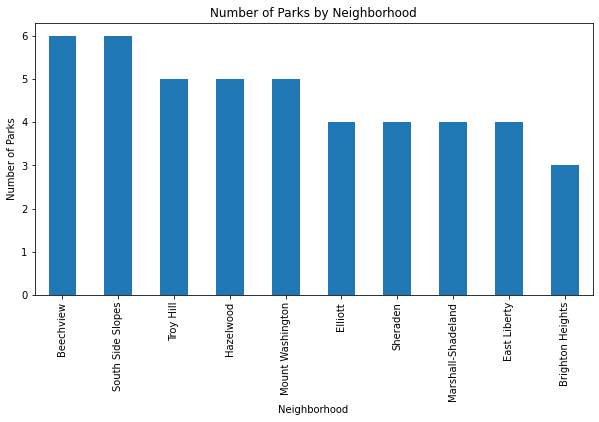

In [29]:
data = {'Beechview': 6, 'South Side Slopes': 6, 'Troy Hill': 5, 'Hazelwood': 5,
        'Mount Washington': 5, 'Elliott': 4, 'Sheraden': 4, 'Marshall-Shadeland': 4,
        'East Liberty': 4, 'Brighton Heights': 3}

parks = pd.Series(data)

parks.plot(kind='bar', figsize=(10,5))
plt.title('Number of Parks by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Parks')
plt.show()

Now we will load in data from arrests

In [30]:
df2 = pd.read_csv("arrests.csv")
df2.head()

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


|Again, there is a lot of unneeded data so we can simplify it.

In [31]:
df2[["ARRESTLOCATION", "INCIDENTNEIGHBORHOOD"]]

,ARRESTLOCATION,INCIDENTNEIGHBORHOOD
0,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield
1,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City
2,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood
3,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny
4,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights
...,...,...
61371,"900 Block 2nd AV Pittsburgh, PA 15219",Larimer
61372,"2000 Block Centre AV Pittsburgh, PA 15219",Crawford-Roberts
61373,"East Liberty BL & Mellon ST Pittsburgh, PA 15206",East Liberty
61374,"S Bouquet ST & Dawson ST Pittsburgh, PA 15213",Central Oakland


Now we will go through both data sets and make sure that we are only looking at arrests in neighborhoods that contain parks.

In [32]:
neighborhoods1 = set(df['neighborhood'])
neighborhoods2 = set(df2['INCIDENTNEIGHBORHOOD'])

common_neighborhoods = neighborhoods1.intersection(neighborhoods2)



new_arrests = df2[df2['INCIDENTNEIGHBORHOOD'].isin(common_neighborhoods)]

common_neighborhoods = list(common_neighborhoods)
common_neighborhoods.sort()

df_common_neighborhoods = pd.DataFrame({'Common Neighborhoods': common_neighborhoods})

df_common_neighborhoods.head(73)

,Common Neighborhoods
0,Allegheny Center
1,Allentown
2,Arlington
3,Banksville
4,Bedford Dwellings
5,Beechview
6,Beltzhoover
7,Bloomfield
8,Bluff
9,Bon Air


Now we can get the neighborhoods with the least amount of arrests.

In [33]:
counted_arrests = new_arrests['INCIDENTNEIGHBORHOOD'].value_counts()
top_fifty_neighborhoods = counted_arrests.nsmallest(51)

df3 = pd.DataFrame({'Neighborhood': top_fifty_neighborhoods.index, 'Arrest Count': top_fifty_neighborhoods.values})

df3.head(51)

,Neighborhood,Arrest Count
0,Central Northside,23
1,Regent Square,35
2,New Homestead,39
3,Swisshelm Park,40
4,East Carnegie,48
5,Oakwood,79
6,Hays,106
7,Fairywood,112
8,Windgap,115
9,Polish Hill,153


To make the data easier to read we can make another bar plot.

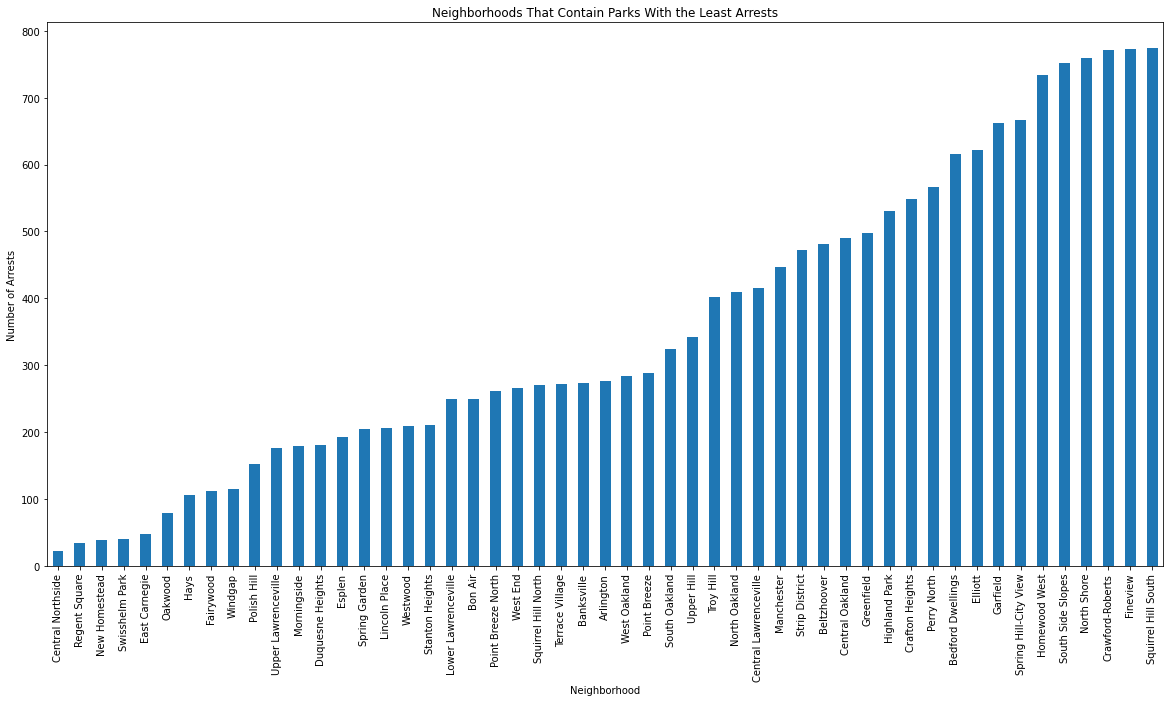

In [34]:
top_fifty_neighborhoods.plot(kind='bar', figsize=(20,10))
plt.title('Neighborhoods That Contain Parks With the Least Arrests')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Arrests')
plt.show()

Finally we will search through and find the neighborhood with the most amount of parks and least amount of arrests.

In [35]:
parks_only_df = df[df['type'] == 'Park']
neighborhood_counts = parks_only_df['neighborhood'].value_counts()
top_park_neighborhoods = neighborhood_counts.head(51).index.tolist()


counted_arrests = new_arrests['INCIDENTNEIGHBORHOOD'].value_counts()
top_arrest_neighborhoods = counted_arrests.nsmallest(51).index.tolist()


neighborhoods = list(set(top_park_neighborhoods) & set(top_arrest_neighborhoods))


max_parks = 0
min_arrests = float('inf')
chosen_neighborhood = ""
for neighborhood in neighborhoods:
    park_count = parks_only_df[parks_only_df['neighborhood'] == neighborhood].shape[0]
    arrest_count = new_arrests[new_arrests['INCIDENTNEIGHBORHOOD'] == neighborhood].shape[0]
    if park_count > max_parks and arrest_count < min_arrests:
        max_parks = park_count
        min_arrests = arrest_count
        chosen_neighborhood = neighborhood

print("The neighborhood with the most parks but least arrests is:", chosen_neighborhood)

The neighborhood with the most parks but least arrests is: Lower Lawrenceville


In conclusion we can assume that Troy Hill is both the healthiest and safest neighborhood using this data set. 

# Conclusion
After looking at all of the data, out group has decided that Squirrel Hill North is the safest and healthiest neighborhood to live in. It is 5th in the highest median age at death population (or 5th longest living individuals). It is second in educational attianment and household income, and it is on the lower end of the total arrests with 2 parks just next door in South Squirrel Hill. This leads us to believe that not only do those in North Squirrel Hill live very long and fulfilling lives and feel more secure, they will also have happier lives. That is why we believe Squirrel Hill North is the best neighborhood in Pittsburgh. Below you can see that Squirrel Hill North has the fifth longest living residents by a near zero margin...

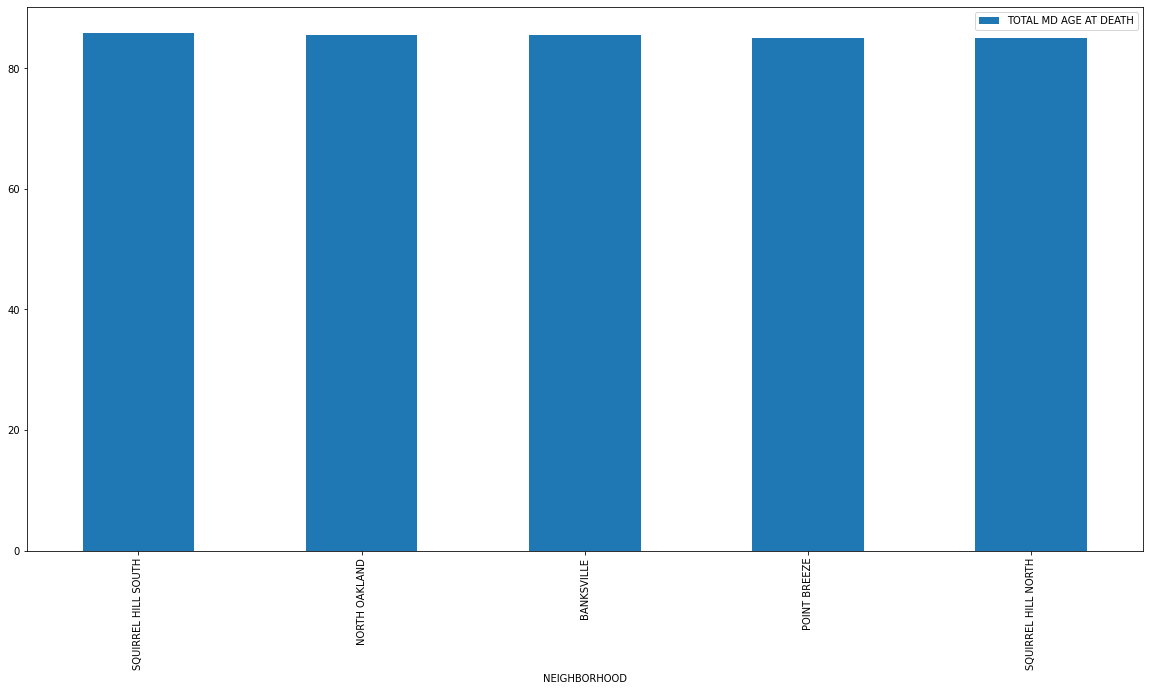

In [44]:
highest_lifes.head(5).plot.bar(x="NEIGHBORHOOD", y = 'TOTAL MD AGE AT DEATH', rot=90, figsize=(20,10))


In [52]:
highest_lifes.head(5)

,NEIGHBORHOOD,TOTAL MD AGE AT DEATH
89,SQUIRREL HILL SOUTH,85.9
76,NORTH OAKLAND,85.6
71,BANKSVILLE,85.5
53,POINT BREEZE,85.1
68,SQUIRREL HILL NORTH,85.0


And here you can see that Squirrel Hill North places second in our metric for educational attainment and household income *(NOTE: The blue bar displays household income, the orange bar displays the educational attainment, and the green bar shows the overall score)*

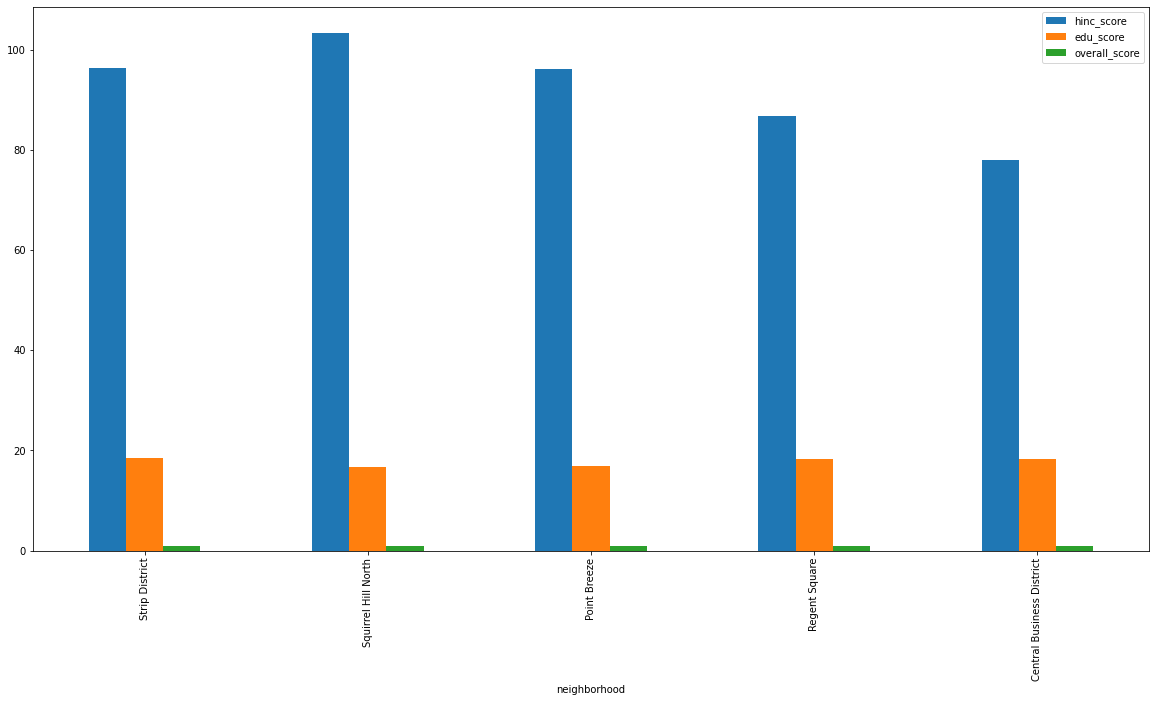

In [50]:
sortednbscores.head().plot.bar(x = 'neighborhood', rot=90, figsize=(20,10))


In [49]:
sortednbscores.head()

,neighborhood,hinc_score,edu_score,overall_score
78,Strip District,96.432692,18.451754,0.966527
74,Squirrel Hill North,103.351632,16.699211,0.952510
62,Point Breeze,96.161401,16.876123,0.922519
65,Regent Square,86.680672,18.377193,0.917328
16,Central Business District,78.036077,18.230104,0.871521


And finally, we can see that, all things considered, Squirrel Hill North has a very safe neighborhood, ranking among the lower end in police arrest data, with many parks nearby

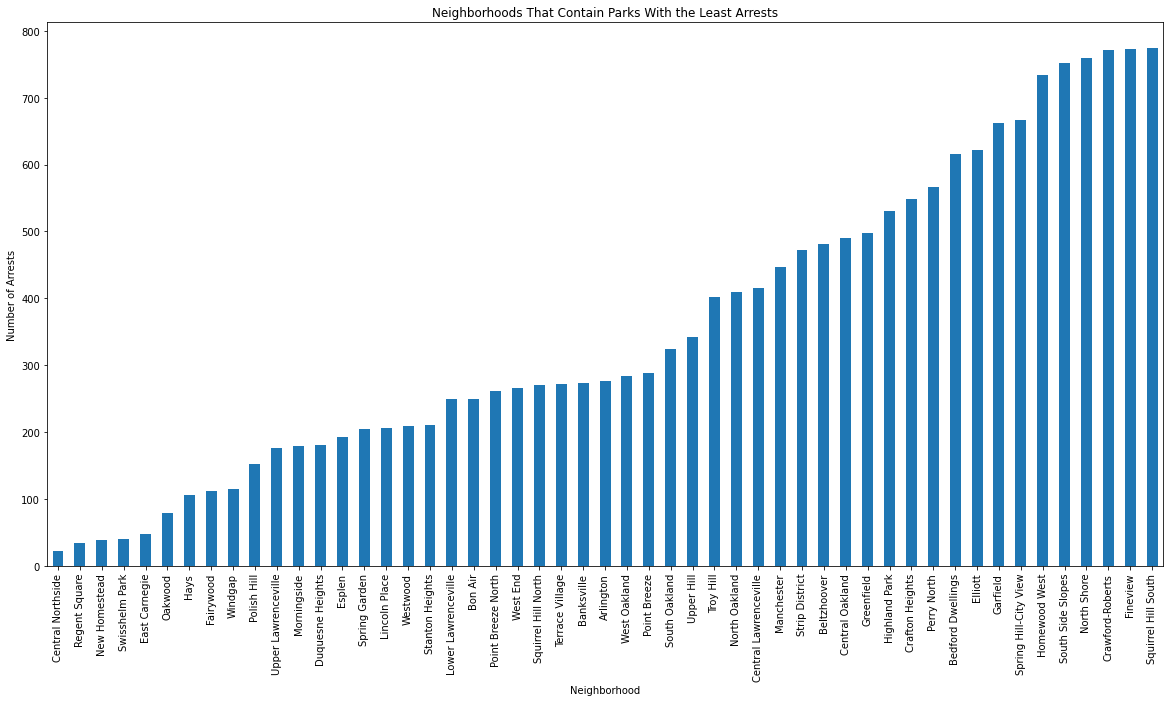

In [58]:
top_fifty_neighborhoods.plot(kind='bar', figsize=(20,10))
plt.title('Neighborhoods That Contain Parks With the Least Arrests')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Arrests')
plt.show()

Considering all of these things, this is why we believe Squirrel Hill North is the best neighborhood using our metric.